# Examining App Development Potential Based on Data for Apps Available on both Apple and Android

In looking for datasets to dive into, I thought that these two from kaggle proved pretty interesting: https://www.kaggle.com/lava18/google-play-store-apps and https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps. 

These datasets had information from both google play and the app store regarding categories, ratings, genres, and pricing for all of the apps on each store.  If an app-making company was so inclined, it could use this information to gain market insight into the basis for a successful app.  

For this project, I decided to look at that data as if I was working for a company that builds free apps, with a main source of revenue being in-app ads.  This means that revenue would be gained from users engaging with those ads, which means that the more users using that app, the better.  How can I analyze this data to help gain insight into what type of free app would have the highest potential revenue source based on the features given?  Or - will the data reveal that a paid app might be more lucrative? Let's extract some info from this data and see what trends can be discovered! 

# Exploring the Initial Data

Let's see what we have at first glance. 

In [323]:
import pandas as pd
import numpy as np
from pandas import DataFrame

In [324]:
#Two files:

andr = pd.read_csv('/Users/atrain31/Desktop/Data/dq1/googleplaystore.csv')
apple = pd.read_csv('/Users/atrain31/Desktop/Data/dq1/AppleStore.csv')

In [325]:
andr.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [326]:
apple.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [327]:
andr.info(), apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_

(None, None)

So there are some interesting possiblities in this data.  Listed here are the column names (Google play, followed by the Apple app store) for each dataframe that I feel can be correlated and grouped together for analysis, followed by why they may be useful: 

App/track_name - basic identifiers for each column (the apple 'id' doesn't seem to mean anything here)

Category/prime_genre - category of each app ('Genres' seems like it would be too specific and therefore give a cloudier picture of the genres).  This would most likely be the main determinant of what type of app to create - which categories are the most popular?  Which have future potential? 

Rating/user_rating - do higher ratings equal more downloads or possibly higher price? 

Reviews/rating_count_tot  (or Installs??)- see above

(Type & Price)/price - how does pricing affect downloads and ratings?

Content Rating/cont_rating

# Cleaning the Data & Initial Analysis

Before we start, some of the kaggle comments mentioned a line of data (#10472) that was incomplete.  I'm going to verify that the data isn't useful and drop that from the analysis.

In [328]:
print(andr.loc[[10472]])
play = andr.drop(10472)

                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


## Duplicate and English Apps 

In [329]:
play['App'].nunique(), apple['track_name'].nunique()

(9659, 7195)

In [330]:
play_dup = len(play) - play['App'].nunique()
apple_dup = len(apple) - apple['track_name'].nunique()
play_dup, apple_dup

(1181, 2)

Looks the like google play has 1181 duplicate app names, while the app store has two.  Let's create a dictionary to make sure that we have only one of each app in our data; we'll base which one to keep on which one has the most reviews. 

In [331]:
rev_max_play = {}

for i,row in play.iterrows():
    app = row['App']
    num_rev = float(row['Reviews'])
    
    if app in rev_max_play and rev_max_play[app] < num_rev:
        rev_max_play[app] = num_rev
        
    elif app not in rev_max_play:
        rev_max_play[app] = num_rev

len(rev_max_play)

9659

In [332]:
rev_max_apple = {}

for i,row in apple.iterrows():
    appl = row['track_name']
    num_revi = float(row['rating_count_tot'])
    
    if app in rev_max_apple and rev_max_apple[appl] < num_revi:
        rev_max_apple[appl] = num_revi
        
    elif app not in rev_max_apple:
        rev_max_apple[appl] = num_revi

len(rev_max_apple)

7195

In [333]:
play_clean = []
already_added = []

for i,app in play.iterrows():
    name = app['App']
    n_reviews = float(app['Reviews'])
    
    if (rev_max_play[name] == n_reviews) and (name not in already_added):
        play_clean.append(app)
        already_added.append(name) 

In [334]:
apple_clean = []
already_added2 = []

for i,app in apple.iterrows():
    name = app['track_name']
    n_reviews = float(app['rating_count_tot'])
    
    if (rev_max_apple[name] == n_reviews) and (name not in already_added2):
        apple_clean.append(app)
        already_added2.append(name) 

In [335]:
len(play_clean), len(apple_clean)

(9659, 7195)

In [336]:
play_clean_df = pd.DataFrame(play_clean)
apple_clean_df = pd.DataFrame(apple_clean)

apple_clean_df.to_csv('/Users/atrain31/Desktop/Data/dq1/apple_clean.csv')
play_clean_df.to_csv('/Users/atrain31/Desktop/Data/dq1/play_clean.csv')

Now we have two lists, play_clean and apple_clean, which have only one of each app in the data.  The dictionaries worked as the cleaned lists are the exact same length as the number of unique values we originally found in the first step above. 

Further exploring the data, it would most likely be difficult to analyze data from non-english apps.  I'm going to weed those out. 

In [337]:
def english_app(string):
    non_english_count = 0
    for character in string:
        number = ord(character)
        if number > 127:
            non_english_count += 1
        else:
            non_english_count += 0

    if non_english_count>2:
        return False
    else:
        return True
    
#Testing the function:

english_app('爱奇艺PPS -《欢乐颂2》电视剧热播')

False

In [338]:
play_english = []
for app in play_clean:
    name = app[1]
    if english_app(name):
        play_english.append(app)
    else:
        None

apple_english = []
for app in apple_clean:
    name = app[1]
    if english_app(name):
        apple_english.append(app)
    else:
        None
len(play_english),len(apple_english)    

(9659, 6153)

We are now down to 9659 apps on google play and 6152 on the app store. 

Let's see how many of those apps were free - remember,  in the scenario I mentioned in the intro, I'm looking for free apps in an effort to develop an app based on ad revenue.  

## Pricing

Let's look at the pricing of the available apps:

In [339]:
play_english_df = pd.DataFrame(play_english)
apple_english_df = pd.DataFrame(apple_english)

In [340]:
play_english_df.Type.unique()

array(['Free', 'Paid', nan], dtype=object)

Nan comes up as a type of app, so let's see how many are listed: 

In [341]:
play_english_df['Type'].isnull().sum()

1

In [342]:
play2 = play_english_df[play_english_df['Type'].isnull()]
play2

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


The price of the Type NaN app is zero and there is only one instance of this, but let's base our pricing on the "Price" column rather than the "Type" column and go from there (also the app store data does not have a Type column).  Let's see what we have for a ranger for both datasets:

In [343]:
play_english_df['Price'].isnull().sum(), apple_english_df['price'].isnull().sum()

(0, 0)

In [344]:
apple_english_df['price'].min(), apple_english_df['price'].max()

(0.0, 299.99)

In [345]:
play_english_df['Price'].min(), play_english_df['Price'].max()

('$0.99', '0')

The Apple range looks good, but the Google range is off.  Let's fix that: 

In [346]:
play_english_df['Price'] = play_english_df['Price'].str.replace('$','')

In [347]:
play_english_df['Price'] = pd.to_numeric(play_english_df['Price'])

In [348]:
play_english_df['Price'].min(), play_english_df['Price'].max()

(0.0, 400.0)

In [434]:
apple_english_df.to_csv('/Users/atrain31/Desktop/Data/dq1/apple_english.csv')
play_english_df.to_csv('/Users/atrain31/Desktop/Data/dq1/play_english_df.csv')

Before moving forward, I'd like to take a look at how prevalent paid apps are vs free apps and get an idea of how popular each type is with users. 

In [350]:
play_free = play_english_df[play_english_df['Price']==0.0]
apple_free = apple_english_df[apple_english_df['price']==0.0]

In [351]:
len(play_free), len(apple_free)

(8905, 3201)

There are 9659 total unique English apps in the Play store, 8905 of which are free; 6153 and 3201 in the app store.  I'd like to plug this into Tableau and see what it looks like (if you are not viewing on a Jupyter notebook please click the link below or view the static image of the Tableau viz):

In [352]:
%%HTML
<div class='tableauPlaceholder' id='viz1597409129902' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Go&#47;GooglePlayAppPriceRelativetoNumberofReviewsandAverageRating&#47;Sheet1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GooglePlayAppPriceRelativetoNumberofReviewsandAverageRating&#47;Sheet1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Go&#47;GooglePlayAppPriceRelativetoNumberofReviewsandAverageRating&#47;Sheet1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1597409129902');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

https://public.tableau.com/views/GooglePlayAppPriceRelativetoofReviewsandAverageRating/Sheet2?:language=en&:display_count=y&publish=yes&:origin=viz_share_link

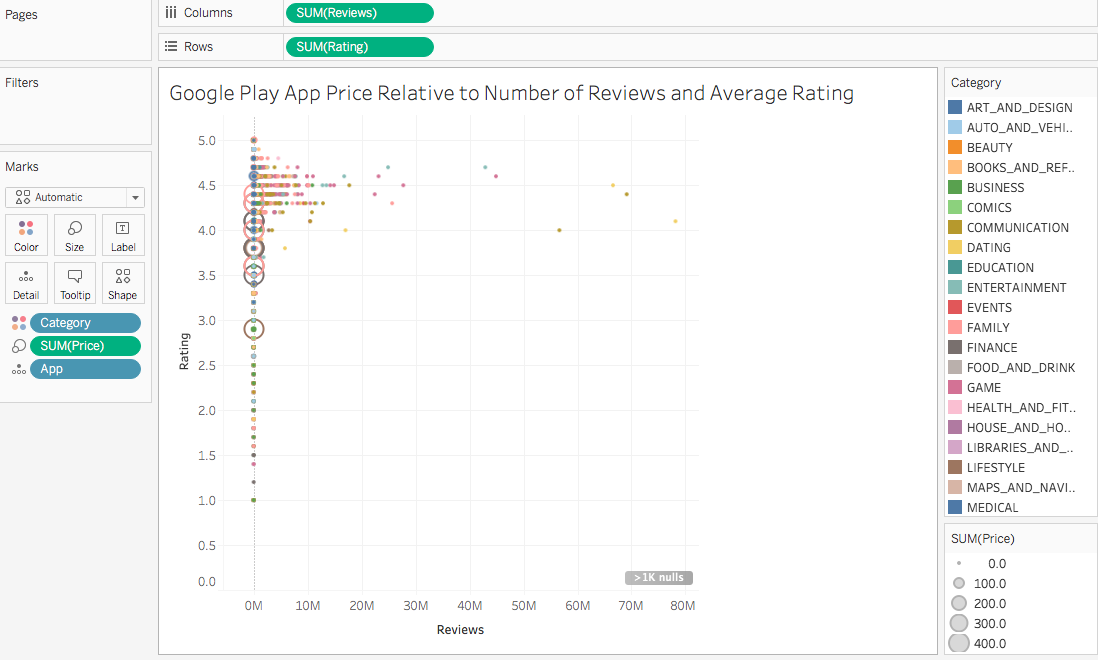

The extreme popularity of ~50 apps totally skewers this graph, making it almost unusable, BUT - one thing we can see is that all of the very popular apps are free apps.  Let's further examine this: 

In [354]:
play_paid = play_english_df[play_english_df['Price']>0.0]

play_free['Reviews'] = play_free['Reviews'].astype(int)
play_paid['Reviews'] = play_paid['Reviews'].astype(int)

play_paid_popular = play_paid[play_paid['Reviews']>500000]
play_free_popular = play_free[play_free['Reviews']>500000]
len(play_paid_popular), len(play_free_popular)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(1, 585)

In [355]:
play_paid_popular2 = play_paid[play_paid['Reviews']>100000]
play_free_popular2 = play_free[play_free['Reviews']>100000]
len(play_paid_popular2), len(play_free_popular2)

(8, 1443)

In [356]:
print(play_free['Reviews'].max())
print(play_paid['Reviews'].max())

78158306
2376564


Wow!  This is a huge difference in popularity.  Not only do the most popular apps get tens of millions of reviews, but with the exception of only one, there are no paid apps with over 500,000 reviews.  And - only eight paid apps surpass 100,000 reviews, while 1443(!) surpass this amount.  

Let's look at the stats for the app store:

In [357]:
apple_paid = apple_english_df[apple_english_df['price']>0.0]

apple_free['rating_count_tot'] = apple_free['rating_count_tot'].astype(int)

apple_paid_popular = apple_paid[apple_paid['rating_count_tot']>100000]
apple_free_popular = apple_free[apple_free['rating_count_tot']>100000]
len(apple_paid_popular), len(apple_free_popular)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(19, 199)

Again, there is a large difference, almost ten fold in the popularity of free apps vs. paid apps

Seeing as we're looking into an app with the highest earning potential, it would seem that our chances would be much better with a free app with revenue earned through advertisements.  

For the remainder of this analysis, I'll base our data on the free apps only. 

## Categories 

In [358]:
play_free['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [359]:
apple_free['prime_genre'].unique()

array(['Social Networking', 'Photo & Video', 'Games', 'Music',
       'Reference', 'Health & Fitness', 'Weather', 'Utilities', 'Travel',
       'Shopping', 'News', 'Navigation', 'Lifestyle', 'Entertainment',
       'Food & Drink', 'Sports', 'Book', 'Finance', 'Education',
       'Productivity', 'Business', 'Catalogs', 'Medical'], dtype=object)

The differences in categories between the two operating systems prevents us really from combining the data together. 

## Number of Reviews(Ratings)/Installs 

In [360]:
#Cleaning the Installs column:
play_free['Installs'] = play_free['Installs'].str.replace('+','')
play_free['Installs'] = play_free['Installs'].str.replace(',','')
play_free['Installs'] = play_free['Installs'].astype(int)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.or

In [374]:
play_free['Installs'].unique()

array([     10000,    5000000,   50000000,     100000,      50000,
          1000000,   10000000,       5000,     500000, 1000000000,
        100000000,       1000,  500000000,        500,        100,
               50,         10,          1,          5,          0])

In [393]:
play_free.sort_values('Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
391,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.0,Teen,Social,"July 31, 2018",Varies with device,Varies with device
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device
464,Hangouts,COMMUNICATION,4.0,3419513,Varies with device,1000000000,Free,0.0,Everyone,Communication,"July 21, 2018",Varies with device,Varies with device
3665,YouTube,VIDEO_PLAYERS,4.3,25655305,Varies with device,1000000000,Free,0.0,Teen,Video Players & Editors,"August 2, 2018",Varies with device,Varies with device
2554,Google+,SOCIAL,4.2,4831125,Varies with device,1000000000,Free,0.0,Teen,Social,"July 26, 2018",Varies with device,Varies with device
1872,Subway Surfers,GAME,4.5,27725352,76M,1000000000,Free,0.0,Everyone 10+,Arcade,"July 12, 2018",1.90.0,4.1 and up
2884,Google Photos,PHOTOGRAPHY,4.5,10859051,Varies with device,1000000000,Free,0.0,Everyone,Photography,"August 6, 2018",Varies with device,Varies with device
3523,Google Drive,PRODUCTIVITY,4.4,2731211,Varies with device,1000000000,Free,0.0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device


Here we can see that there are several dominant apps in various categories that are outliers and don't represent 'regular' apps. This is better illustrated below (if you are not viewing on a Jupyter notebook please click the link below or view the static image of the Tableau viz):

In [405]:
%%HTML
<div class='tableauPlaceholder' id='viz1597608679877' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Go&#47;GooglePlayOutliers&#47;Sheet4&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GooglePlayOutliers&#47;Sheet4' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Go&#47;GooglePlayOutliers&#47;Sheet4&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1597608679877');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

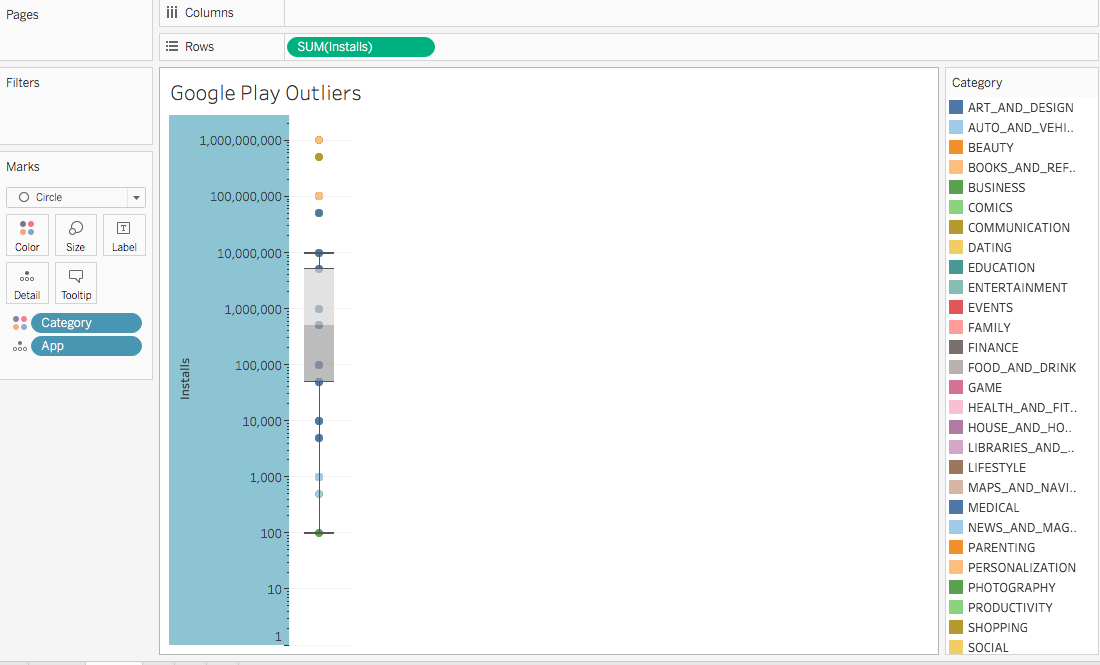

https://public.tableau.com/views/GooglePlayOutliers/Sheet4?:language=en&:display_count=y&:origin=viz_share_link

Let's see what happens when we sort by the mean # of installs for each category:

In [406]:
play_free.groupby('Category')['Installs'].mean().sort_values(ascending=False).reset_index()

,Category,Installs
0,COMMUNICATION,3.832263e+07
1,VIDEO_PLAYERS,2.457395e+07
2,SOCIAL,2.325365e+07
3,PHOTOGRAPHY,1.777202e+07
4,PRODUCTIVITY,1.673896e+07
5,GAME,1.555200e+07
6,TRAVEL_AND_LOCAL,1.398408e+07
7,ENTERTAINMENT,1.164071e+07
8,TOOLS,1.078701e+07
9,NEWS_AND_MAGAZINES,9.401636e+06


Now let's see what happens when we take out the top 5% of installed apps and the bottom 5% and we revisit the mean, we can see that the the order has been displaced once the extremely popular apps are removed.  I'd probably stay away from the video players, social, and communication categories as making an app in those categories would face stiff competition.  

In [407]:
iqr = play_free[play_free['Installs'].between(play_free['Installs'].quantile(.05), play_free['Installs'].quantile(.95), inclusive=True)]
iqr.groupby('Category')['Installs'].mean().sort_values(ascending=False).reset_index()

,Category,Installs
0,ENTERTAINMENT,3.808684e+06
1,PHOTOGRAPHY,3.453283e+06
2,GAME,3.306546e+06
3,SHOPPING,3.074517e+06
4,COMMUNICATION,2.476439e+06
5,WEATHER,2.465977e+06
6,VIDEO_PLAYERS,2.387278e+06
7,SOCIAL,2.146381e+06
8,SPORTS,2.081032e+06
9,TRAVEL_AND_LOCAL,2.055750e+06


In [385]:
len(iqr), len(play_free)

(8032, 8905)

In [394]:
iqr.sort_values('Installs',ascending=False)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
5948,PBA® Bowling Challenge,SPORTS,4.3,242096,87M,10000000,Free,0.0,Everyone,Sports,"August 2, 2018",3.4.4,4.1 and up
3149,Despegar.com Hotels and Flights,TRAVEL_AND_LOCAL,4.4,150932,27M,10000000,Free,0.0,Everyone,Travel & Local,"July 30, 2018",9.1.0,4.1 and up
3268,Google app for Android TV,TOOLS,3.0,66,Varies with device,10000000,Free,0.0,Everyone,Tools,"July 19, 2018",Varies with device,Varies with device
3267,AT&T Smart Wi-Fi,TOOLS,3.9,18513,6.1M,10000000,Free,0.0,Everyone,Tools,"April 26, 2018",3.2,4.1 and up
3264,HTC Lock Screen,TOOLS,4.1,28250,Varies with device,10000000,Free,0.0,Everyone,Tools,"March 21, 2017",Varies with device,Varies with device
3263,Phone,TOOLS,3.6,45483,Varies with device,10000000,Free,0.0,Everyone,Tools,"July 30, 2018",Varies with device,Varies with device
3262,Clear,TOOLS,3.1,24151,15M,10000000,Free,0.0,Everyone,Tools,"August 6, 2018",11.7.0,4.1 and up
3260,File Manager -- Take Command of Your Files Easily,TOOLS,4.2,127223,7.6M,10000000,Free,0.0,Everyone,Tools,"August 3, 2018",v7.0.7.1.0625.1_06_0629,5.0 and up
3257,Files Go by Google: Free up space on your phone,TOOLS,4.6,315585,8.5M,10000000,Free,0.0,Everyone,Tools,"July 18, 2018",1.0.204375696,5.0 and up
3256,"ZenUI Keyboard – Emoji, Theme",TOOLS,4.5,537554,Varies with device,10000000,Free,0.0,Everyone,Tools,"August 1, 2018",Varies with device,Varies with device


In [386]:
play_free2 = iqr

I think that the number of times an app was reviewed is a nice gauge to see how popular an app was (it's also necessary when looking at the Apple data as there is no data on the amount of installs). On Google it is the 'Reviews' column and on Apple it is the 'rating_count_tot' column.  I want to make sure the results aren't skewed with apps that were rated a limited number of times, so I'm going to omit the lowest quartile when looking at the number of reviews/ratings.  

In [387]:
play_free2['Reviews'] = play_free2['Reviews'].astype(int)
play_free2.Reviews.quantile([0.25,0.5,0.75])

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0.25       42.00
0.50     1375.50
0.75    27506.75
Name: Reviews, dtype: float64

In [389]:
play_english = play_free2[play_free2['Reviews']>42]

In [431]:
play_english.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up


In [363]:
apple_free['rating_count_tot'].min(), apple_free['rating_count_tot'].max()

(0, 2974676)

In [408]:
apple_free.rating_count_tot.quantile([0.25,0.5,0.75,0.95])

0.25       147.0
0.50      1204.0
0.75      9975.0
0.95    119316.0
Name: rating_count_tot, dtype: float64

In [412]:
apple_english = apple_free[(apple_free['rating_count_tot']>147) & (apple_free['rating_count_tot']<119316)]

Again, let's look at the before and after when the top and bottom 5% are removed:

In [426]:
apple_free.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False).reset_index()

,prime_genre,rating_count_tot
0,Navigation,86090.333333
1,Reference,79350.470588
2,Social Networking,71548.349057
3,Music,57326.530303
4,Weather,52279.892857
5,Book,46384.916667
6,Food & Drink,33333.923077
7,Finance,32367.028571
8,Photo & Video,28441.543750
9,Travel,28243.800000


In [427]:
apple_english.groupby('prime_genre')['rating_count_tot'].mean().sort_values(ascending=False).reset_index()

,prime_genre,rating_count_tot
0,Book,38066.750000
1,Weather,27613.500000
2,Finance,19415.363636
3,Shopping,18160.338462
4,Food & Drink,17887.647059
5,Social Networking,16858.388235
6,Productivity,16823.666667
7,Sports,15323.162791
8,News,15225.785714
9,Utilities,14104.490909


In [366]:
#DL these clean files to desktop for Tableau use 

apple_english.to_csv('/Users/atrain31/Desktop/Data/dq1/apple_english.csv')
play_english.to_csv('/Users/atrain31/Desktop/Data/dq1/play_english.csv')

## Ratings

In [367]:
%%HTML

<div class='tableauPlaceholder' id='viz1597420646361' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Go&#47;GooglePlayAppRatingvs_Installs&#47;Sheet2&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='GooglePlayAppRatingvs_Installs&#47;Sheet2' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Go&#47;GooglePlayAppRatingvs_Installs&#47;Sheet2&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1597420646361');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

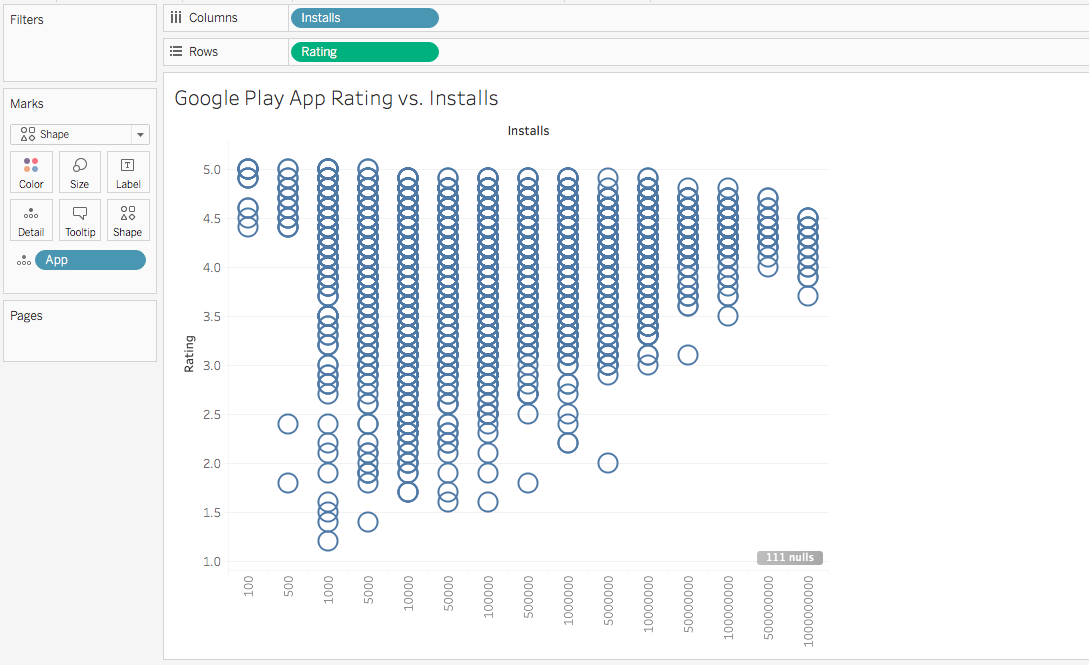

https://public.tableau.com/views/GooglePlayAppRatingvs_Installs/Sheet2?:language=en&:display_count=y&:origin=viz_share_link

Conventional wisdom would point to app ratings increasing as the number of installs increases, and this chart reflects that thought.  Obviously a poorly reviewed product will decrease it's popularity.  Going forward we can assume that a well-made and well-reviewed app will translate into higher downloads. 

# Further Analysis

Now that we have the list of apps that are both in english and free, we can really dive into some potential trends.  I'd like to check on how many reviews per category are present, so I'll create two dictionaries for each dataset: 1) the count for the number of apps for each category and 2) the number of reviews for each category.  

In [419]:
# Google Play
categories_two  = list(set(play_english['Category']))
categ_inst_dict = {}
categ_count = {}
categ_avg_rating = {}

for cat in categories_two:

    new_df = play_english[play_english['Category']==cat]
    
    count = 0
    count += len(new_df)
    sum_of_installs = new_df['Reviews'].sum()
    categ_inst_dict[cat] = sum_of_installs
    categ_count[cat] = count
    
    ratings_count = 0
    ratings_df = new_df.dropna(subset=['Rating'])
    ratings_count = len(ratings_df)
    categ_avg_rating[cat] = (ratings_df['Rating'].sum())/ratings_count

    
#App Store
categories_three  = list(set(apple_english['prime_genre']))
a_categ_inst_dict = {}
a_categ_count = {}

for cat in categories_three:
    a_count = 0
    a_new_df = apple_english[apple_english['prime_genre']==cat]
    a_new_df['rating_count_tot'] = a_new_df['rating_count_tot'].astype(int)
    a_count += len(a_new_df)
    a_sum_of_installs = a_new_df['rating_count_tot'].sum()
    a_categ_inst_dict[cat] = a_sum_of_installs
    a_categ_count[cat] = a_count

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [420]:
# Testing the dictionary
categ_inst_dict['BUSINESS'], categ_count['BUSINESS'], categ_avg_rating['BUSINESS']

(4931593, 164, 4.093827160493827)

The Google data: 

In [421]:
new_play_df = pd.DataFrame(categories_two,columns=['Category'])
new_play_df['Count'] = new_play_df['Category'].map(categ_count)
new_play_df['# of Reviews'] = new_play_df['Category'].map(categ_inst_dict)
new_play_df['Avg # Reviews Per App'] = (new_play_df['# of Reviews'] / new_play_df['Count'])
new_play_df['% of Total Apps'] = (new_play_df['Count'] / new_play_df['Count'].sum())
new_play_df.sort_values('% of Total Apps',ascending=False)

,Category,Count,# of Reviews,Avg # Reviews Per App,% of Total Apps
20,FAMILY,1172,81417526,69468.878840,0.194781
8,GAME,669,107215876,160262.893871,0.111185
18,TOOLS,488,26208389,53705.715164,0.081104
26,FINANCE,243,11631014,47864.255144,0.040386
23,LIFESTYLE,214,8912231,41645.939252,0.035566
4,SPORTS,209,19403576,92840.076555,0.034735
2,PRODUCTIVITY,205,13842509,67524.434146,0.034070
7,HEALTH_AND_FITNESS,195,14406257,73878.241026,0.032408
11,PERSONALIZATION,187,11222479,60013.256684,0.031079
5,PHOTOGRAPHY,180,18485694,102698.300000,0.029915


In [422]:
new_play_df.sort_values('Avg # Reviews Per App',ascending=False)

,Category,Count,# of Reviews,Avg # Reviews Per App,% of Total Apps
8,GAME,669,107215876,160262.893871,0.111185
30,SOCIAL,154,17539773,113894.629870,0.025594
5,PHOTOGRAPHY,180,18485694,102698.300000,0.029915
16,ENTERTAINMENT,76,7482110,98448.815789,0.012631
28,COMMUNICATION,166,15789565,95117.861446,0.027588
4,SPORTS,209,19403576,92840.076555,0.034735
32,VIDEO_PLAYERS,109,9703585,89023.715596,0.018115
15,WEATHER,60,4752509,79208.483333,0.009972
21,SHOPPING,150,11677111,77847.406667,0.024929
7,HEALTH_AND_FITNESS,195,14406257,73878.241026,0.032408


The Apple Data:

In [423]:
new_apple = pd.DataFrame(categories_three,columns=['Category'])
new_apple['Count'] = new_apple['Category'].map(a_categ_count)
new_apple['# of Ratings'] = new_apple['Category'].map(a_categ_inst_dict)
new_apple['Avg # Ratings Per App'] = (new_apple['# of Ratings'] / new_apple['Count'])
new_apple['% of Total Apps'] = (new_apple['Count'] / new_apple['Count'].sum())
new_apple.sort_values('% of Total Apps',ascending=False)

,Category,Count,# of Ratings,Avg # Ratings Per App,% of Total Apps
21,Games,1274,14150897,11107.454474,0.569258
13,Entertainment,191,2357265,12341.701571,0.085344
0,Photo & Video,121,1539030,12719.256198,0.054066
14,Social Networking,85,1432963,16858.388235,0.037980
19,Education,75,538759,7183.453333,0.033512
18,Shopping,65,1180422,18160.338462,0.029044
8,Utilities,55,775747,14104.490909,0.024576
3,Music,51,694758,13622.705882,0.022788
2,Productivity,45,757065,16823.666667,0.020107
6,Health & Fitness,44,495306,11256.954545,0.019660


In [424]:
new_apple.sort_values('Avg # Ratings Per App',ascending=False)

,Category,Count,# of Ratings,Avg # Ratings Per App,% of Total Apps
22,Book,8,304534,38066.750000,0.003575
7,Weather,10,276135,27613.500000,0.004468
11,Finance,22,427138,19415.363636,0.009830
18,Shopping,65,1180422,18160.338462,0.029044
4,Food & Drink,17,304090,17887.647059,0.007596
14,Social Networking,85,1432963,16858.388235,0.037980
2,Productivity,45,757065,16823.666667,0.020107
10,Sports,43,658896,15323.162791,0.019214
16,News,28,426322,15225.785714,0.012511
8,Utilities,55,775747,14104.490909,0.024576


## Conclusion

Questions and ideas to consider when developing a new app:

- Filtering out the extremely popular apps gives a clearer picture of how to look at which categories perform the best on each platform.  Minus a revolutionary idea, it probably wouldn't make sense to go up against an app in one of these categories.  

- Cross-checking the categories which are the most popular with the ones that have the most reviews per app (Games on Google and Social on Apple) would show that these categories would be the safer bet.  

- The app development team would have to make a decision, based on app idea, as to finding an area that is not too saturated (such as Family on Google) vs an area that is popular but still has some potential (such as Books on ios).  
- Does the app idea cost continual money to maintain? ie - a paid API to a sports betting site

- Would it be possible to make an app focused on a potentially popular category based on an exisiting popular idea?  

With all of these taken into consideration the data suggests that something in the Books category may prove lucrative - it is a well reviewed category but still has room for growth.  If users were able to interact in a social setting and discuss books, review/recommend books, and maybe even participate in games related to books, I think that something like this would check a lot of the boxes for the popular categories of apps without infringing on the existing apps.  Most of the data would be user-generated and new content is consistently being generated.  